In [7]:
import pickle
import numpy as np
from pathlib import Path
import warnings
import IO

In [2]:
verbs_fpath = Path('annotations/EPIC_verb_classes.csv')
nouns_fpath = Path('annotations/EPIC_noun_classes.csv')
train_labels_fpath = Path("annotations/EPIC_train_action_labels.pkl")

verbs, nouns, train_labels = IO.filter_action_classes(verbs_fpath, nouns_fpath, train_labels_fpath)

In [3]:
from collections import defaultdict

verbs_indices = {v.id_: ind for ind, v in enumerate(verbs)}
nouns_indices = {n.id_: ind for ind, n in enumerate(nouns)}

num_instances = np.zeros((len(verbs), len(nouns)))
for index, row in train_labels.iterrows():
    verb_ind = verbs_indices[row['verb_class']]
    noun_ind = nouns_indices[row['noun_class']]
    num_instances[verb_ind, noun_ind] += 1

Calculating seconds histogram

In [4]:
from IO import get_duration

action_durations = list()
for index, row in train_labels.iterrows():
    action_durations.append(get_duration(row))
action_durations = np.asarray(action_durations)

Min:  0.5
Mean:  3.3845031337996194
Median:  1.7800000000000296
Std. Dev.:  5.0367369878431445
Mode: 1.0
Max:  145.16000000000003
Threshold:  4.0
Num instances:  0.8069761104550822


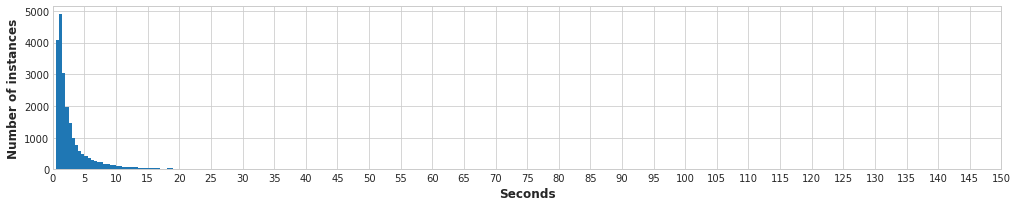

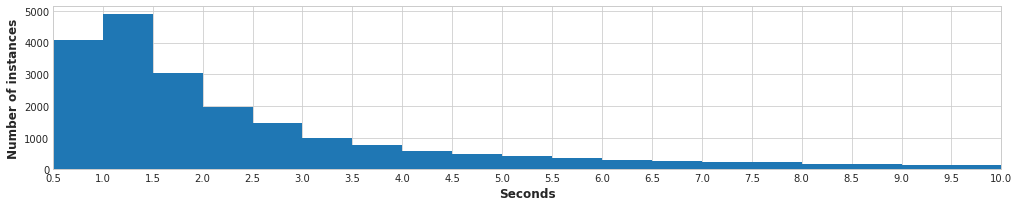

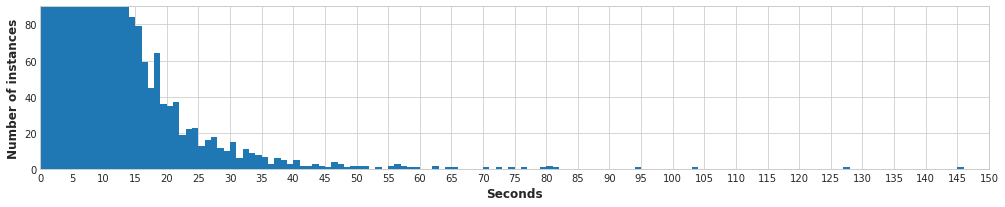

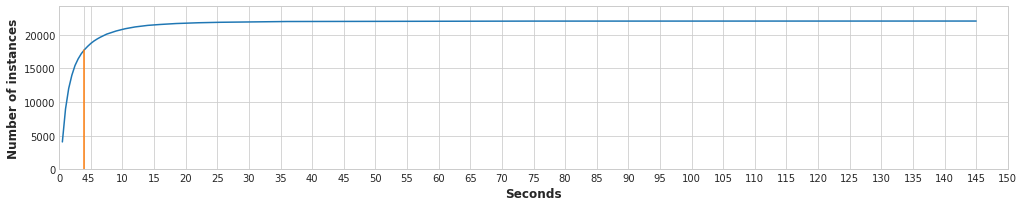

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import stats
%matplotlib inline


hist, bin_edges = np.histogram(action_durations, bins=np.arange(0.5,146,0.5))
cum_hist_sum = np.cumsum(hist)
total_num_instances = cum_hist_sum[-1]
threshold_ind = np.argmax(cum_hist_sum>0.8*total_num_instances)

print('Min: ', action_durations.min())
print('Mean: ', action_durations.mean())
print('Median: ', np.median(action_durations))
print('Std. Dev.: ', action_durations.std())
print('Mode:', stats.mode(action_durations).mode[0])
print('Max: ', action_durations.max())
print('Threshold: ', bin_edges[threshold_ind])
print('Num instances: ', cum_hist_sum[threshold_ind]/total_num_instances)

sns.set_style("whitegrid")
fig = plt.figure(figsize=(17, 3))
plt.clf()
ax = fig.add_subplot(111)
ax.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align="edge")
ax.set_xlim(0, 150)
plt.xticks(np.arange(0, 155, step=5))
plt.xlabel('Seconds',fontweight='bold',fontsize=12);
plt.ylabel('Number of instances',fontweight='bold',fontsize=12);
plt.show()
fig.savefig('images/histogram_of_duration_1.eps', format='eps', dpi=300, bbox_inches='tight')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(17, 3))
plt.clf()
ax = fig.add_subplot(111)
ax.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align="edge")
ax.set_xlim(0.5, 10)
plt.xticks(np.arange(0.5, 10.5, step=0.5))
plt.xlabel('Seconds',fontweight='bold',fontsize=12);
plt.ylabel('Number of instances',fontweight='bold',fontsize=12);
plt.show()
fig.savefig('images/histogram_of_duration_2.eps', format='eps', dpi=300, bbox_inches='tight')

sns.set_style("whitegrid")
hist_1_sec, bin_edges_1_sec = np.histogram(action_durations, bins=np.arange(0,147,1))
fig = plt.figure(figsize=(17, 3))
plt.clf()
ax = fig.add_subplot(111)
ax.bar(bin_edges_1_sec[:-1], hist_1_sec, width=np.diff(bin_edges_1_sec), align="edge")
ax.set_xlim(0, 150)
ax.set_ylim(0, 90)
plt.xticks(np.arange(0, 155, step=5))
plt.xlabel('Seconds',fontweight='bold',fontsize=12);
plt.ylabel('Number of instances',fontweight='bold',fontsize=12);
plt.show()
fig.savefig('images/histogram_of_duration_3.eps', format='eps', dpi=300, bbox_inches='tight')

fig = plt.figure(figsize=(17, 3))
plt.clf()
ax = fig.add_subplot(111)
ax.plot(bin_edges[:-1], cum_hist_sum)
ax.plot([bin_edges[threshold_ind],bin_edges[threshold_ind]], [0,cum_hist_sum[threshold_ind]])
ax.set_xlim(0, 150)
ax.set_ylim(0, 1.1*cum_hist_sum[-1])

xticks = [bin_edges[threshold_ind]]
xticks.extend(range(0,155,5))

plt.xticks(sorted(xticks))
plt.xlabel('Seconds',fontweight='bold',fontsize=12);
plt.ylabel('Number of instances',fontweight='bold',fontsize=12);
plt.show()
fig.savefig('images/duration_cut.eps', format='eps', dpi=300, bbox_inches='tight')

Min:  0.5
Mean:  3.3845031337996194
Median:  1.7800000000000296
Std. Dev.:  5.0367369878431445
Mode: 1.0
Max:  145.16000000000003
Threshold:  4.0
Num instances:  0.8069761104550822


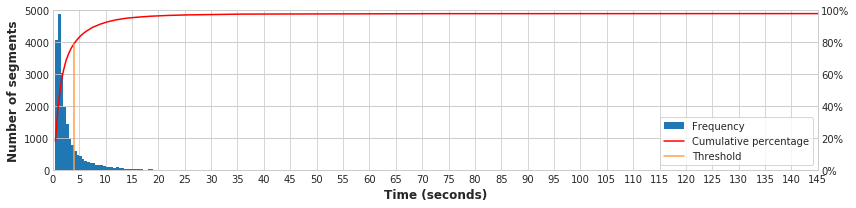

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import stats
%matplotlib inline


hist, bin_edges = np.histogram(action_durations, bins=np.arange(0.5,146,0.5))
cum_hist_sum = np.cumsum(hist)
total_num_instances = cum_hist_sum[-1]
threshold_ind = np.argmax(cum_hist_sum>0.8*total_num_instances)

print('Min: ', action_durations.min())
print('Mean: ', action_durations.mean())
print('Median: ', np.median(action_durations))
print('Std. Dev.: ', action_durations.std())
print('Mode:', stats.mode(action_durations).mode[0])
print('Max: ', action_durations.max())
print('Threshold: ', bin_edges[threshold_ind])
print('Num instances: ', cum_hist_sum[threshold_ind]/total_num_instances)

sns.set_style("whitegrid", {'legend.frameon':True})
fig, ax1 = plt.subplots(figsize=(12, 3))
hist_plot = ax1.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align="edge", label = 'Frequency')
ax1.set_xlim(0, 145)
ax1.set_ylim(0, 5000)
ax1.set_xlabel('Time (seconds)',fontweight='bold',fontsize=12)
ax1.set_ylabel('Number of segments',fontweight='bold',fontsize=12)
plt.xticks(np.arange(0, 150, step=5))

ax2 = ax1.twinx()
cum_pert_plot = ax2.plot(bin_edges[:-1], np.max(hist)*cum_hist_sum/total_num_instances, 'r', label = 'Cumulative percentage')
threshold_plot = ax2.plot([bin_edges[threshold_ind],bin_edges[threshold_ind]], 
         [0,np.max(hist)*cum_hist_sum[threshold_ind]/total_num_instances],'#FF9E4A', label = 'Threshold')
ax2.set_ylim(0, 5000)
ax2.set_yticklabels(('0%','20%','40%','60%','80%','100%'), fontdict=None, minor=False)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

plt.legend(handles1+handles2, labels1+labels2, loc='lower right')

fig.tight_layout()
plt.show()
fig.savefig('images/histogram_of_video_segments_time_duration.eps', format='eps', dpi=300, bbox_inches='tight')


Min:  0.5
Mean:  3.3845031337996194
Median:  1.7800000000000296
Std. Dev.:  5.0367369878431445
Mode: 1.0
Max:  145.16000000000003
Threshold:  4.0
Num instances:  0.8069761104550822


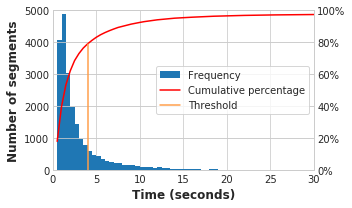

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import stats
%matplotlib inline


hist, bin_edges = np.histogram(action_durations, bins=np.arange(0.5,146,0.5))
cum_hist_sum = np.cumsum(hist)
total_num_instances = cum_hist_sum[-1]
threshold_ind = np.argmax(cum_hist_sum>0.8*total_num_instances)

print('Min: ', action_durations.min())
print('Mean: ', action_durations.mean())
print('Median: ', np.median(action_durations))
print('Std. Dev.: ', action_durations.std())
print('Mode:', stats.mode(action_durations).mode[0])
print('Max: ', action_durations.max())
print('Threshold: ', bin_edges[threshold_ind])
print('Num instances: ', cum_hist_sum[threshold_ind]/total_num_instances)

sns.set_style("whitegrid", {'legend.frameon':True})
fig, ax1 = plt.subplots(figsize=(5, 3))
hist_plot = ax1.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align="edge", label = 'Frequency')

ax1.set_xlabel('Time (seconds)',fontweight='bold',fontsize=12)
ax1.set_ylabel('Number of segments',fontweight='bold',fontsize=12)
plt.xticks(np.arange(0, 150, step=5))

ax2 = ax1.twinx()
cum_pert_plot = ax2.plot(bin_edges[:-1], np.max(hist)*cum_hist_sum/total_num_instances, 'r', label = 'Cumulative percentage')
threshold_plot = ax2.plot([bin_edges[threshold_ind],bin_edges[threshold_ind]], 
         [0,np.max(hist)*cum_hist_sum[threshold_ind]/total_num_instances],'#FF9E4A', label = 'Threshold')
ax2.set_ylim(0, 5000)
ax2.set_yticklabels(('0%','20%','40%','60%','80%','100%'), fontdict=None, minor=False)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

plt.legend(handles1+handles2, labels1+labels2, loc='center right')
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 5000)


fig.tight_layout()
plt.show()
fig.savefig('images/histogram_of_video_segments_time_duration.eps', format='eps', dpi=300, bbox_inches='tight')


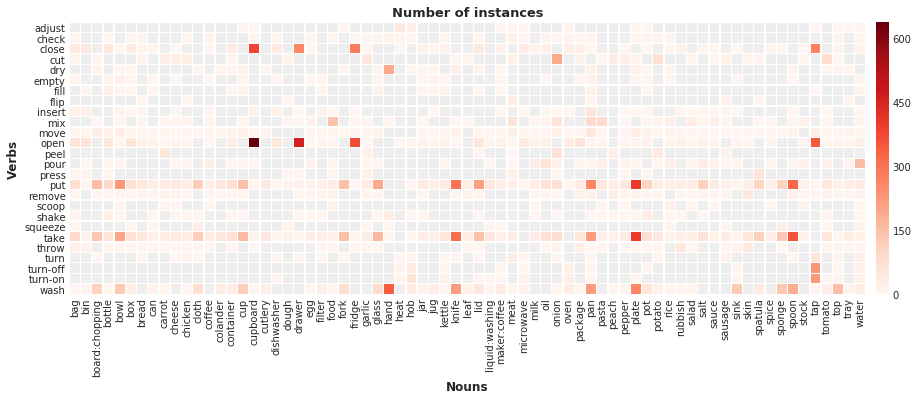

In [92]:
verb_names = [v.name for v in verbs]
noun_names = [n.name for n in nouns]

figsize = (17, 5)

cmap = list(reversed(sns.color_palette("Reds_r",650).as_hex()))
cmap[0] = '#EEEEEE'
cmap = ListedColormap(cmap)

fig = plt.figure(figsize=figsize)
plt.clf()
ax = fig.add_subplot(111)

# ax.set_aspect(1)
sns.heatmap(num_instances, cmap=cmap, xticklabels=noun_names, yticklabels=verb_names, linewidths=0.3, cbar_kws={'pad':0.01})#, cbar=None)
plt.title('Number of instances',fontweight='bold',fontsize=13)
plt.xlabel('Nouns',fontweight='bold',fontsize=12)
plt.ylabel('Verbs',fontweight='bold',fontsize=12)
plt.show()

fig.savefig('images/histogram_of_classes.eps', format='eps', dpi=300, bbox_inches='tight')

In [8]:
verbs_names_by_id = {v.id_:v.name for v in verbs}
nouns_names_by_id = {n.id_:n.name for n in nouns}

num_instances_by_action = defaultdict(int)
for index, row in train_labels.iterrows():
    verb_name = verbs_names_by_id[row['verb_class']]
    noun_name = nouns_names_by_id[row['noun_class']]
    action = '{} {}'.format(verb_name, noun_name)
    num_instances_by_action[action] += 1
    
actions = sorted(num_instances_by_action.keys())
num_instances_by_action = [num_instances_by_action[a] for a in actions]
num_instances_by_action, actions = zip(*reversed(sorted(zip(num_instances_by_action, actions))))

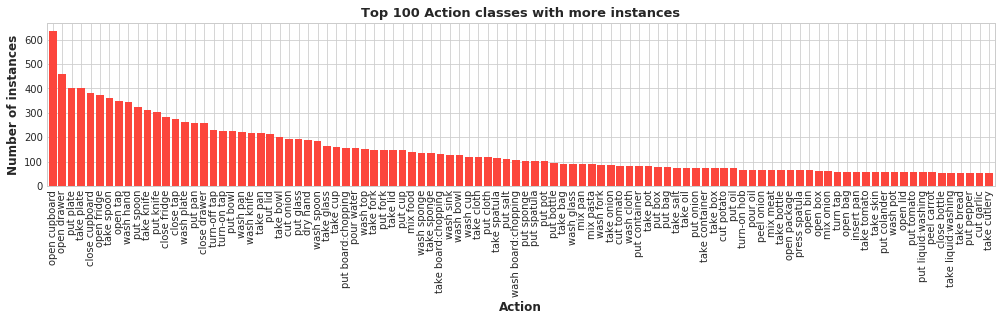

In [9]:
import pandas as pd

df = pd.DataFrame(data={'Number of Instances': num_instances_by_action[:100]})
ax = df.plot.bar(figsize=(17,3),legend=False, width=0.8,color=['#fc453c'])

plt.title('Top 100 Action classes with more instances',fontweight='bold',fontsize=13)
plt.ylabel('Number of instances',fontweight='bold',fontsize=12)
plt.xlabel('Action',fontweight='bold',fontsize=12)
ax.set_xticklabels(actions[:100])
plt.show()

# Random classification accuracy baseline

### Calculating the random accuracy baseline

Let $c_{i}$ represent the class $i$ from $N$ classes and $s_{i}$ the number of instances. Then, the number of True Positives is:

$$TP=\sum_{i}^{N}{s_{i}\cdot p_{i}}$$

where $p_{i}=\frac{s_{i}}{\sum_{j}^{N}s_j}=\frac{s_{i}}{S_{N}}$ represents the probability of class $c_i$. The mean accuracy is:

$$acc=\frac{TP}{S_N}=\sum_{i}^{N}{\frac{1}{S_N}\cdot s_{i}\cdot p_{i}}=\sum_{i}^{N}{p_{i}\cdot p_{i}}$$

Considering the probabilities from training and validation as separate, then:

$$acc=\sum_{i}^{N}{p^{train}_{i}\cdot p^{validation}_{i}}$$


Loading the data splits for *verbs*, *nouns*, and *actions*

In [1]:
from addict import Dict as adict
from IO.dataset import EpicAudioDataset
import pickle
import tables
import numpy as np
import evaluation as evl

conf = adict()

conf.all_action_classes_map = "annotations/EPIC_ARC_all_classes_map.pkl"
# conf.action_classes_map = "annotations/EPIC_ARC_classes_map.pkl"
conf.all_action_splits = "annotations/EPIC_ARC_all_splits.pkl"
# conf.action_splits = "annotations/EPIC_ARC_splits.pkl"
conf.all_noun_classes_map = "annotations/EPIC_ARC_all_noun_classes_map.pkl"
# conf.noun_classes_map = "annotations/EPIC_ARC_noun_classes_map.pkl"
# conf.noun_splits = "annotations/EPIC_ARC_noun_splits.pkl"
conf.all_verb_classes_map = "annotations/EPIC_ARC_all_verb_classes_map.pkl"
# conf.verb_classes_map = "annotations/EPIC_ARC_verb_classes_map.pkl"
# conf.verb_splits = "annotations/EPIC_ARC_verb_splits.pkl"
conf.all_audio_hdf5 = "EPIC_KITCHENS_2018/action/audio/train/all_audio_dataset_norm_4secs.hdf5"
# conf.audio_hdf5 = "EPIC_KITCHENS_2018/action/audio/train/audio_dataset_norm_4secs_1.hdf5"

all_action_classes_map = pickle.load(open(conf.all_action_classes_map, "rb"))
# action_classes_map = pickle.load(open(conf.action_classes_map, "rb"))
all_action_splits = pickle.load(open(conf.all_action_splits, "rb"))
# action_splits = pickle.load(open(conf.action_splits, "rb"))
all_verb_classes_map = pickle.load(open(conf.all_verb_classes_map, "rb"))
# verb_classes_map = pickle.load(open(conf.verb_classes_map, "rb"))
# verb_splits = pickle.load(open(conf.verb_splits, "rb"))
all_noun_classes_map = pickle.load(open(conf.all_noun_classes_map, "rb"))
# noun_classes_map = pickle.load(open(conf.noun_classes_map, "rb"))
# noun_splits = pickle.load(open(conf.noun_splits, "rb"))

# audio_dataset = tables.open_file(conf.audio_hdf5, mode='r')
# segments = audio_dataset.root.segments
# segments_indices = {s['index']: i for i, s in enumerate(audio_dataset.root.segments)}

all_audio_dataset = tables.open_file(conf.all_audio_hdf5, mode='r')
all_segments = all_audio_dataset.root.segments
all_segments_indices = {s['index']: i for i, s in enumerate(all_audio_dataset.root.segments)}

## All actions

Counting the instances per category in all splits

In [2]:
from collections import defaultdict

labels = defaultdict(lambda: list())
verb_labels = defaultdict(lambda: list())
noun_labels = defaultdict(lambda: list())
for split_name in ['train', 'validation', 'test']:
    for idx in all_action_splits[split_name]:
        idx = all_segments_indices[idx]
        segment = all_segments[idx]
        verb_id = segment['verb_class']
        noun_id = segment['noun_class']        
        category = all_action_classes_map[verb_id][noun_id]
        labels[split_name].append(category)
        
        verb_category = all_verb_classes_map[verb_id]
        verb_labels[split_name].append(verb_category)
        
        noun_category = all_noun_classes_map[noun_id]
        noun_labels[split_name].append(noun_category)
        
labels = {split_name: np.asarray(labelz) for split_name, labelz in labels.items()}
verb_labels = {split_name: np.asarray(labelz) for split_name, labelz in verb_labels.items()}
noun_labels = {split_name: np.asarray(labelz) for split_name, labelz in noun_labels.items()}

Random accuracy baselines:

In [3]:
rab_val = evl.random_accuracy_baseline(labels, test_split='validation')
rab_test = evl.random_accuracy_baseline(labels)

print('Validation random_accuracy_baseline: {:.4%}'.format(rab_val))
print('Test random_accuracy_baseline: {:.4%}'.format(rab_test))

Validation random_accuracy_baseline: 0.4650%
Test random_accuracy_baseline: 0.4334%


In [4]:
rab_val = evl.random_accuracy_baseline(verb_labels, test_split='validation')
rab_test = evl.random_accuracy_baseline(verb_labels)

print('Validation random_accuracy_baseline: {:.4%}'.format(rab_val))
print('Test random_accuracy_baseline: {:.4%}'.format(rab_test))

Validation random_accuracy_baseline: 11.8920%
Test random_accuracy_baseline: 11.3810%


In [5]:
rab_val = evl.random_accuracy_baseline(noun_labels, test_split='validation')
rab_test = evl.random_accuracy_baseline(noun_labels)

print('Validation random_accuracy_baseline: {:.4%}'.format(rab_val))
print('Test random_accuracy_baseline: {:.4%}'.format(rab_test))

Validation random_accuracy_baseline: 1.6451%
Test random_accuracy_baseline: 1.5758%


In [14]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_baseline = evl.calculate_random_baseline(labels=labels,n=1000)

print('Top-1 Acc: {:.2%}'.format(random_baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(random_baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(random_baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(random_baseline.avg_recall))

Top-1 Acc: 0.43%
Top-5 Acc: 2.14%
Avg Class Precision: 0.05%
Avg Class Recall: 0.06%


In [15]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_baseline = evl.calculate_random_baseline(labels=verb_labels,n=1000)

print('Top-1 Acc: {:.2%}'.format(random_baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(random_baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(random_baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(random_baseline.avg_recall))

Top-1 Acc: 11.37%
Top-5 Acc: 47.48%
Avg Class Precision: 0.99%
Avg Class Recall: 0.99%


In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_baseline = evl.calculate_random_baseline(labels=noun_labels,n=1000)

print('Top-1 Acc: {:.2%}'.format(random_baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(random_baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(random_baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(random_baseline.avg_recall))

Top-1 Acc: 1.58%
Top-5 Acc: 7.71%
Avg Class Precision: 0.34%
Avg Class Recall: 0.34%


Random largest classes baselines:

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    baseline = evl.calculate_largest_class_baseline(labels)

print('Top-1 Acc: {:.2%}'.format(baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(baseline.avg_recall))

Top-1 Acc: 2.10%
Top-5 Acc: 7.54%
Avg Class Precision: 0.00%
Avg Class Recall: 0.07%


In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    baseline = evl.calculate_largest_class_baseline(verb_labels)

print('Top-1 Acc: {:.2%}'.format(baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(baseline.avg_recall))

Top-1 Acc: 20.19%
Top-5 Acc: 66.93%
Avg Class Precision: 0.21%
Avg Class Recall: 1.05%


In [13]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    baseline = evl.calculate_largest_class_baseline(noun_labels)

print('Top-1 Acc: {:.2%}'.format(baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(baseline.avg_recall))

Top-1 Acc: 4.11%
Top-5 Acc: 18.38%
Avg Class Precision: 0.01%
Avg Class Recall: 0.36%


## Actions

Counting the instances per category in all splits

In [9]:
from collections import defaultdict

labels = defaultdict(lambda: list())
verb_labels = defaultdict(lambda: list())
noun_labels = defaultdict(lambda: list())
for split_name in ['train', 'validation', 'test']:
    for idx in action_splits[split_name]:
        idx = segments_indices[idx]
        segment = segments[idx]
        verb_id = segment['verb_class']
        noun_id = segment['noun_class']        
        category = action_classes_map[verb_id][noun_id]
        labels[split_name].append(category)
        
        verb_category = verb_classes_map[verb_id]
        verb_labels[split_name].append(verb_category)
        
        noun_category = noun_classes_map[noun_id]
        noun_labels[split_name].append(noun_category)
        
labels = {split_name: np.asarray(labelz) for split_name, labelz in labels.items()}
verb_labels = {split_name: np.asarray(labelz) for split_name, labelz in verb_labels.items()}
noun_labels = {split_name: np.asarray(labelz) for split_name, labelz in noun_labels.items()}

Random accuracy baselines:

In [12]:
rab_val = evl.random_accuracy_baseline(labels, test_split='validation')
rab_test = evl.random_accuracy_baseline(labels)

print('Validation random_accuracy_baseline: {:.4%}'.format(rab_val))
print('Test random_accuracy_baseline: {:.4%}'.format(rab_test))

Validation random_accuracy_baseline: 0.7465%
Test random_accuracy_baseline: 0.7304%


In [27]:
rab_val = evl.random_accuracy_baseline(verb_labels, test_split='validation')
rab_test = evl.random_accuracy_baseline(verb_labels)

print('Validation random_accuracy_baseline: {:.4%}'.format(rab_val))
print('Test random_accuracy_baseline: {:.4%}'.format(rab_test))

Validation random_accuracy_baseline: 13.1778%
Test random_accuracy_baseline: 12.9063%


In [28]:
rab_val = evl.random_accuracy_baseline(noun_labels, test_split='validation')
rab_test = evl.random_accuracy_baseline(noun_labels)

print('Validation random_accuracy_baseline: {:.4%}'.format(rab_val))
print('Test random_accuracy_baseline: {:.4%}'.format(rab_test))

Validation random_accuracy_baseline: 2.4631%
Test random_accuracy_baseline: 2.4436%


In [13]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_baseline = evl.calculate_random_baseline(labels=labels,n=10000)

print('Top-1 Acc: {:.2%}'.format(random_baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(random_baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(random_baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(random_baseline.avg_recall))

Top-1 Acc: 0.73%
Top-5 Acc: 3.61%
Avg Class Precision: 0.14%
Avg Class Recall: 0.15%


In [32]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_baseline = evl.calculate_random_baseline(labels=verb_labels,n=500)

print('Top-1 Acc: {:.2%}'.format(random_baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(random_baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(random_baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(random_baseline.avg_recall))

Top-1 Acc: 12.88%
Top-5 Acc: 55.16%
Avg Class Precision: 3.84%
Avg Class Recall: 3.84%


In [31]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_baseline = evl.calculate_random_baseline(labels=noun_labels,n=100)

print('Top-1 Acc: {:.2%}'.format(random_baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(random_baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(random_baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(random_baseline.avg_recall))

Top-1 Acc: 2.44%
Top-5 Acc: 11.97%
Avg Class Precision: 1.41%
Avg Class Recall: 1.41%


Random largest classes baselines:

In [10]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    baseline = evl.calculate_largest_class_baseline(labels)

print('Top-1 Acc: {:.2%}'.format(baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(baseline.avg_recall))

Top-1 Acc: 2.81%
Top-5 Acc: 10.10%
Avg Class Precision: 0.00%
Avg Class Recall: 0.16%


In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    baseline = evl.calculate_largest_class_baseline(verb_labels)

print('Top-1 Acc: {:.2%}'.format(baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(baseline.avg_recall))

Top-1 Acc: 21.06%
Top-5 Acc: 73.73%
Avg Class Precision: 0.81%
Avg Class Recall: 3.85%


In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    baseline = evl.calculate_largest_class_baseline(noun_labels)

print('Top-1 Acc: {:.2%}'.format(baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(baseline.avg_recall))

Top-1 Acc: 5.33%
Top-5 Acc: 23.64%
Avg Class Precision: 0.08%
Avg Class Recall: 1.41%


## Verbs

Counting the instances per category in all splits

In [13]:
from collections import defaultdict

labels = defaultdict(lambda: list())
for split_name in ['train', 'validation', 'test']:
    for idx in verb_splits[split_name]:
        idx = segments_indices[idx]
        segment = segments[idx]
        verb_id = segment['verb_class']
        category = verb_classes_map[verb_id]
        labels[split_name].append(category)
        
labels = {split_name: np.asarray(labelz) for split_name, labelz in labels.items()}

Random accuracy baselines:

In [15]:
rab_val = evl.random_accuracy_baseline(labels, test_split='validation')
rab_test = evl.random_accuracy_baseline(labels)

print('Validation random_accuracy_baseline: {:.4%}'.format(rab_val))
print('Test random_accuracy_baseline: {:.4%}'.format(rab_test))

Validation random_accuracy_baseline: 13.1182%
Test random_accuracy_baseline: 13.1123%


In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_baseline = evl.calculate_random_baseline(labels=labels,n=10000)

print('Top-1 Acc: {:.2%}'.format(random_baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(random_baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(random_baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(random_baseline.avg_recall))

Top-1 Acc: 13.12%
Top-5 Acc: 55.99%
Avg Class Precision: 3.84%
Avg Class Recall: 3.84%


In [14]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    baseline = evl.calculate_largest_class_baseline(labels)

print('Top-1 Acc: {:.2%}'.format(baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(baseline.avg_recall))

Top-1 Acc: 21.53%
Top-5 Acc: 75.26%
Avg Class Precision: 0.83%
Avg Class Recall: 3.85%


## Nouns

Counting the instances per category in all splits

In [15]:
from collections import defaultdict

labels = defaultdict(lambda: list())
for split_name in ['train', 'validation', 'test']:
    for idx in noun_splits[split_name]:
        idx = segments_indices[idx]
        segment = segments[idx]
        noun_id = segment['noun_class']
        category = noun_classes_map[noun_id]
        labels[split_name].append(category)

Random accuracy baselines:

In [18]:
rab_val = evl.random_accuracy_baseline(labels, test_split='validation')
rab_test = evl.random_accuracy_baseline(labels)

print('Validation random_accuracy_baseline: {:.4%}'.format(rab_val))
print('Test random_accuracy_baseline: {:.4%}'.format(rab_test))

Validation random_accuracy_baseline: 2.4629%
Test random_accuracy_baseline: 2.4639%


In [19]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_baseline = evl.calculate_random_baseline(labels=labels,n=10000)

print('Top-1 Acc: {:.2%}'.format(random_baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(random_baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(random_baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(random_baseline.avg_recall))

Top-1 Acc: 2.47%
Top-5 Acc: 12.04%
Avg Class Precision: 1.41%
Avg Class Recall: 1.41%


In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    baseline = evl.calculate_largest_class_baseline(labels)

print('Top-1 Acc: {:.2%}'.format(baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(baseline.avg_recall))

Top-1 Acc: 5.39%
Top-5 Acc: 24.01%
Avg Class Precision: 0.08%
Avg Class Recall: 1.41%


# Baradel

In [17]:
from addict import Dict as adict
import pickle
import tables
import numpy as np
import evaluation as evl
import warnings
from collections import defaultdict

conf = adict()
conf.baradel_splits = "annotations/EPIC_ARC_Baradel_splits.pkl"
conf.baradel_classes_map = "annotations/EPIC_ARC_Baradel_classes_map.pkl"
conf.baradel_audio_hdf5 = "EPIC_KITCHENS_2018/action/audio/train/all_audio_dataset_norm_4secs.hdf5"

splits = pickle.load(open(conf.baradel_splits, "rb"))
baradel_classes_map = pickle.load(open(conf.baradel_classes_map, "rb"))

audio_dataset = tables.open_file(conf.baradel_audio_hdf5, mode='r')
segments = audio_dataset.root.segments
segments_indices = {s['index']: i for i, s in enumerate(audio_dataset.root.segments)}

labels = defaultdict(lambda: list())
for split_name in ['train', 'validation', 'test']:
    for idx in splits[split_name]:
        idx = segments_indices[idx]
        segment = segments[idx]
        verb_id = segment['verb_class']
        category = baradel_classes_map[verb_id]
        labels[split_name].append(category)

labels = {split_name: np.asarray(labelz) for split_name, labelz in labels.items()}

In [21]:
rab_val = evl.random_accuracy_baseline(labels, test_split='validation')
rab_test = evl.random_accuracy_baseline(labels)

print('Validation random_accuracy_baseline: {:.4%}'.format(rab_val))
print('Test random_accuracy_baseline: {:.4%}'.format(rab_test))

Validation random_accuracy_baseline: 11.6114%
Test random_accuracy_baseline: 11.7491%


In [22]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_baseline = evl.calculate_random_baseline(labels=labels,n=10000)

print('Top-1 Acc: {:.2%}'.format(random_baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(random_baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(random_baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(random_baseline.avg_recall))

Top-1 Acc: 11.75%
Top-5 Acc: 48.86%
Avg Class Precision: 0.99%
Avg Class Recall: 0.98%


In [18]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    baseline = evl.calculate_largest_class_baseline(labels)

print('Top-1 Acc: {:.2%}'.format(baseline.top1_acc))
print('Top-5 Acc: {:.2%}'.format(baseline.top5_acc))
print('Avg Class Precision: {:.2%}'.format(baseline.avg_precision))
print('Avg Class Recall: {:.2%}'.format(baseline.avg_recall))

Top-1 Acc: 21.97%
Top-5 Acc: 69.44%
Avg Class Precision: 0.31%
Avg Class Recall: 1.41%


In [15]:
from IO import EpicClass
verbs = EpicClass.load_from(verbs_fpath.as_posix())

class_indices = [i for i in baradel_classes_map .items()]
class_indices.sort(key=lambda x: x[1])
class_indices = [i[0] for i in class_indices]
categories = [verbs[i].name for i in class_indices]

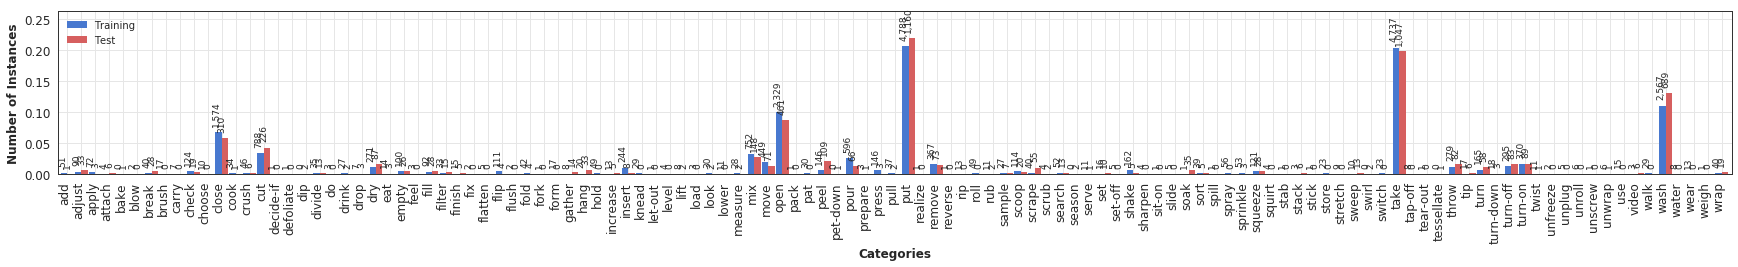

In [48]:
from pylab import annotate
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import imp
import brightside as bs
imp.reload(bs)
imp.reload(evl)

num_categories = len(baradel_classes_map)
histograms = np.zeros((num_categories,2),dtype=np.float32)
for hist_ind, split_name in zip([0,0,1],['train', 'validation', 'test']):
    category, count = np.unique(labels[split_name],return_counts=True)
    histograms[category,hist_ind] += count

norm_histograms = np.zeros((num_categories,2),dtype=np.float32)
norm_histograms[:,0] = histograms[:,0]/ np.sum(histograms[:,0])# np.linalg.norm(histograms[:,0])
norm_histograms[:,1] = histograms[:,1]/ np.sum(histograms[:,1])#np.linalg.norm(histograms[:,1])

histogram = pd.DataFrame(data=norm_histograms,index=categories,columns=['Training','Test'])

sns.color_palette()
from matplotlib.colors import ListedColormap
import brightside as bs
my_cmap = sns.light_palette("Navy", as_cmap=True)
my_cmap = ListedColormap(sns.color_palette("muted", 3).as_hex())
fig, ax = bs.plot_datasets_summary(histogram,figsize=(30,3),legend=False,width=0.9,annotate_cols=False,annot_rotation=90,colormap=my_cmap)
for i, (index, row) in enumerate(histogram.iterrows()):
    for j, col in enumerate(histogram.columns.values):
        annotate('{:,.0f}'.format(histograms[i,j]), (i+0.35*(j-1), 0.01+row[col]), ha='center', va='bottom', fontsize=9, rotation=90)
plt.ylim([0, 1.2 * histogram.values.max()])

legend = ax.legend(loc='upper left', shadow=True)
fig.savefig('images/baradel.eps', format='eps', dpi=300, bbox_inches='tight')

# Accessing the dataset

In [23]:
train_labels.head()

,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
uid,,,,,,,,,,,,,
0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,[door],[8]
2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,[door],[8]
3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2,fridge,10,[fridge],[10]
5,P01,P01_01,take container,00:00:16.50,00:00:18.06,990,1083,take,0,container,29,[container],[29]
7,P01,P01_01,close fridge,00:00:21.91,00:00:23.33,1314,1399,close,3,fridge,10,[fridge],[10]


In [24]:
%%bash
head annotations/EPIC_train_action_labels.csv
echo
tail annotations/EPIC_train_action_labels.csv

uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,['door'],[8]
1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,['light'],[113]
2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,['door'],[8]
3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2,fridge,10,['fridge'],[10]
4,P01,P01_01,take celery,00:00:15.25,00:00:16.40,915,983,take,0,celery,185,['celery'],[185]
5,P01,P01_01,take container,00:00:16.50,00:00:18.06,990,1083,take,0,container,29,['container'],[29]
6,P01,P01_01,take tofu,00:00:18.19,00:00:21.14,1091,1268,take,0,tofu,159,['tofu'],[159]
7,P01,P01_01,close fridge,00:00:21.91,00:00:23.33,1314,1399,close,3,fridge,10,['fridge'],[10]
8,P01,P01_01,open fridge,00:00:23.18,00:00:24.29,1390,1457,open,2,fridge,10,['fridge'],[10]

39227,P31,P31_14,wash fork,00:02

In [25]:
train_labels.video_id.unique()

array(['P01_01', 'P01_02', 'P01_03', 'P01_04', 'P01_05', 'P01_06',
       'P01_07', 'P01_08', 'P01_09', 'P01_10', 'P01_16', 'P01_17',
       'P01_18', 'P01_19', 'P02_01', 'P02_02', 'P02_03', 'P02_04',
       'P02_05', 'P02_06', 'P02_07', 'P02_08', 'P02_09', 'P02_10',
       'P02_11', 'P03_02', 'P03_03', 'P03_04', 'P03_05', 'P03_06',
       'P03_07', 'P03_08', 'P03_09', 'P03_10', 'P03_11', 'P03_12',
       'P03_13', 'P03_14', 'P03_15', 'P03_16', 'P03_17', 'P03_18',
       'P03_19', 'P03_20', 'P03_27', 'P03_28', 'P04_01', 'P04_02',
       'P04_03', 'P04_04', 'P04_05', 'P04_06', 'P04_07', 'P04_08',
       'P04_09', 'P04_10', 'P04_11', 'P04_12', 'P04_13', 'P04_14',
       'P04_15', 'P04_16', 'P04_17', 'P04_18', 'P04_19', 'P04_20',
       'P04_21', 'P04_22', 'P04_23', 'P05_01', 'P05_02', 'P05_03',
       'P05_04', 'P05_05', 'P05_06', 'P05_08', 'P06_01', 'P06_02',
       'P06_03', 'P06_05', 'P06_07', 'P06_08', 'P06_09', 'P07_01',
       'P07_02', 'P07_03', 'P07_04', 'P07_05', 'P07_06', 'P07_